In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import numpy as np
from matplotlib import pyplot as plt
import sys
import matplotlib.gridspec as gridspec
from statsmodels.distributions.empirical_distribution import ECDF
sys.path.append("/Users/jenniferskerker/Documents/GradSchool/Research/Equity/Model/Santa_Cruz_WRM_updated/scripts/Plots")
import processing_functions_April2025 as pf
import pandas as pd
import datetime as dt
import itertools

In [2]:
# get all climate combinations
# dry scenarios
real_All = [1270, 1956, 1987, 2770, 3449, 3515, 3574, 4211, 4373, 4937]
dT_All = [5]
dP_All = [80]
dCV_All = [1.2]
demand_All = ['Baseline']
combinations_dry = list(itertools.product(real_All, dT_All, dP_All, dCV_All, demand_All))
#print(combinations_dry)

# wet scenarios
real_All = [1270, 1956, 1987, 2770, 3449, 3515, 3574, 4211, 4373, 4937]
dT_All = [0]
dP_All = [100]
dCV_All = [1.0]
demand_All = ['Baseline']
combinations_wet = list(itertools.product(real_All, dT_All, dP_All, dCV_All, demand_All))
combinations_all = combinations_dry + combinations_wet
print(combinations_all)

[(1270, 5, 80, 1.2, 'Baseline'), (1956, 5, 80, 1.2, 'Baseline'), (1987, 5, 80, 1.2, 'Baseline'), (2770, 5, 80, 1.2, 'Baseline'), (3449, 5, 80, 1.2, 'Baseline'), (3515, 5, 80, 1.2, 'Baseline'), (3574, 5, 80, 1.2, 'Baseline'), (4211, 5, 80, 1.2, 'Baseline'), (4373, 5, 80, 1.2, 'Baseline'), (4937, 5, 80, 1.2, 'Baseline'), (1270, 0, 100, 1.0, 'Baseline'), (1956, 0, 100, 1.0, 'Baseline'), (1987, 0, 100, 1.0, 'Baseline'), (2770, 0, 100, 1.0, 'Baseline'), (3449, 0, 100, 1.0, 'Baseline'), (3515, 0, 100, 1.0, 'Baseline'), (3574, 0, 100, 1.0, 'Baseline'), (4211, 0, 100, 1.0, 'Baseline'), (4373, 0, 100, 1.0, 'Baseline'), (4937, 0, 100, 1.0, 'Baseline')]


In [ ]:
# import and process data- dry/testing
filepath = '' # use filepath location where you have saved the SA results
rof = 0.65
inf_order = ['desal', 'dpr', 'mcasr', 'transfer_soquel', 'transfer_sv']

# SA information
# list of options to loop over
InterestRates = ['High', 'Low']
DesalDeploy = ['Fast', 'Slow']
InfCosts = ['High', 'Low']
RateDesign = ['1tier', '3tiers']
list_dfs = []
for dd, ic, ir, rd in itertools.product(DesalDeploy, InfCosts, InterestRates, RateDesign):

    print('desal deploy time: {}, inf costs: {}, interes rates: {}, rate design: {}'.format(dd, ic, ir, rd))
    # define name to add to filenames
    name_add = f"DD={dd}_IC={ic}_IR={ir}_RD={rd}_"
    # get monthly dataframe
    df_monthly = pf.aggregate_sows_for_inf_rates_monthly(filepath, rof, inf_order, combinations_all, name_add)
    list_dfs.append(df_monthly)
    #df_monthly.to_csv(filepath + 'df_dry.csv')
df_all = pd.concat(list_dfs, ignore_index=False)
df_all.to_csv(filepath + 'df_monthly_SA_InfRates.csv', index=False)

desal deploy time: Fast, inf costs: High, interes rates: High, rate design: 1tier
(1270, 5, 80, 1.2, 'Baseline')
(1956, 5, 80, 1.2, 'Baseline')
(1987, 5, 80, 1.2, 'Baseline')
(2770, 5, 80, 1.2, 'Baseline')
(3449, 5, 80, 1.2, 'Baseline')
(3515, 5, 80, 1.2, 'Baseline')
(3574, 5, 80, 1.2, 'Baseline')
(4211, 5, 80, 1.2, 'Baseline')
(4373, 5, 80, 1.2, 'Baseline')
(4937, 5, 80, 1.2, 'Baseline')
(1270, 0, 100, 1.0, 'Baseline')
(1956, 0, 100, 1.0, 'Baseline')
(1987, 0, 100, 1.0, 'Baseline')
(2770, 0, 100, 1.0, 'Baseline')
(3449, 0, 100, 1.0, 'Baseline')
(3515, 0, 100, 1.0, 'Baseline')
(3574, 0, 100, 1.0, 'Baseline')
(4211, 0, 100, 1.0, 'Baseline')
(4373, 0, 100, 1.0, 'Baseline')
(4937, 0, 100, 1.0, 'Baseline')
desal deploy time: Fast, inf costs: High, interes rates: High, rate design: 3tiers
(1270, 5, 80, 1.2, 'Baseline')
(1956, 5, 80, 1.2, 'Baseline')
(1987, 5, 80, 1.2, 'Baseline')
(2770, 5, 80, 1.2, 'Baseline')
(3449, 5, 80, 1.2, 'Baseline')
(3515, 5, 80, 1.2, 'Baseline')
(3574, 5, 80, 1.2, 

In [ ]:
# import and process household-level data- take sample
filepath = '' # same as above- filepath location where results are saved
rof = 0.65
inf_order = ['desal', 'dpr', 'mcasr', 'transfer_soquel', 'transfer_sv']

# SA information
# list of options to loop over
InterestRates = ['High', 'Low']
DesalDeploy = ['Fast', 'Slow']
InfCosts = ['High', 'Low']
RateDesign = ['1tier', '3tiers']

list_dfs_hh = []
sample_size = 100000
for dd, ic, ir, rd in itertools.product(DesalDeploy, InfCosts, InterestRates, RateDesign):

    print('desal deploy time: {}, inf costs: {}, interes rates: {}, rate design: {}'.format(dd, ic, ir, rd))
    # define name to add to filenames
    name_add = f"DD={dd}_IC={ic}_IR={ir}_RD={rd}_"
    # get monthly dataframe
    df_hh_monthly = pf.aggregate_sows_for_hh_data_long_SA(filepath, rof, inf_order, combinations_all, name_add, sample_size)
    list_dfs_hh.append(df_hh_monthly)
    
df_hh_all = pd.concat(list_dfs_hh, ignore_index=False)
df_hh_all.to_csv(filepath + 'df_monthly_hh_SA_InfRates.csv', index=False)

desal deploy time: Fast, inf costs: High, interes rates: High, rate design: 1tier
Processing: (1270, 5, 80, 1.2, 'Baseline')
Processing: (1956, 5, 80, 1.2, 'Baseline')
Processing: (1987, 5, 80, 1.2, 'Baseline')
Processing: (2770, 5, 80, 1.2, 'Baseline')
Processing: (3449, 5, 80, 1.2, 'Baseline')
Processing: (3515, 5, 80, 1.2, 'Baseline')
Processing: (3574, 5, 80, 1.2, 'Baseline')
Processing: (4211, 5, 80, 1.2, 'Baseline')
Processing: (4373, 5, 80, 1.2, 'Baseline')
Processing: (4937, 5, 80, 1.2, 'Baseline')
Processing: (1270, 0, 100, 1.0, 'Baseline')
Processing: (1956, 0, 100, 1.0, 'Baseline')
Processing: (1987, 0, 100, 1.0, 'Baseline')
Processing: (2770, 0, 100, 1.0, 'Baseline')
Processing: (3449, 0, 100, 1.0, 'Baseline')
Processing: (3515, 0, 100, 1.0, 'Baseline')
Processing: (3574, 0, 100, 1.0, 'Baseline')
Processing: (4211, 0, 100, 1.0, 'Baseline')
Processing: (4373, 0, 100, 1.0, 'Baseline')
Processing: (4937, 0, 100, 1.0, 'Baseline')
desal deploy time: Fast, inf costs: High, intere

In [3]:
# import monthly data after processed
filepath = '/Volumes/OneTouch/AffordPaper1_Results/SA-InfRates/'
df_all = pd.read_csv(filepath + 'df_monthly_SA_InfRates.csv')
df_hh_all = pd.read_csv(filepath + 'df_monthly_hh_SA_InfRates.csv')
print(df_all)

        Opex_monthly_dollars  IRF_revenue_needed  rev_mo_M  real  dT   dP  \
0                        0.0                 0.0   0.00000  1270   5   80   
1                        0.0                 0.0   0.00000  1270   5   80   
2                        0.0                 0.0   0.00000  1270   5   80   
3                        0.0                 0.0   0.00000  1270   5   80   
4                        0.0                 0.0   0.00000  1270   5   80   
...                      ...                 ...       ...   ...  ..  ...   
191995              829430.0                 0.0   0.82943  4937   0  100   
191996              829430.0                 0.0   0.82943  4937   0  100   
191997              829430.0                 0.0   0.82943  4937   0  100   
191998              829430.0                 0.0   0.82943  4937   0  100   
191999              829430.0                 0.0   0.82943  4937   0  100   

        dCV    demand   rof   inf1  ... DesalDeploy InfCosts InterestRate  

In [8]:
# process monthly baseline data
filepath = '/Volumes/OneTouch/AffordPaper1_Results/Baseline_Sims_ROF0.65_Dec2025/'
df_monthly_baseline = pf.aggregate_sows_for_policy_monthly(filepath, rof, inf_order, combinations_all, '')
df_monthly_baseline.to_csv(filepath + 'df_monthly_baseline_SA.csv')

(1270, 5, 80, 1.2, 'Baseline')
(1956, 5, 80, 1.2, 'Baseline')
(1987, 5, 80, 1.2, 'Baseline')
(2770, 5, 80, 1.2, 'Baseline')
(3449, 5, 80, 1.2, 'Baseline')
(3515, 5, 80, 1.2, 'Baseline')
(3574, 5, 80, 1.2, 'Baseline')
(4211, 5, 80, 1.2, 'Baseline')
(4373, 5, 80, 1.2, 'Baseline')
(4937, 5, 80, 1.2, 'Baseline')
(1270, 0, 100, 1.0, 'Baseline')
(1956, 0, 100, 1.0, 'Baseline')
(1987, 0, 100, 1.0, 'Baseline')
(2770, 0, 100, 1.0, 'Baseline')
(3449, 0, 100, 1.0, 'Baseline')
(3515, 0, 100, 1.0, 'Baseline')
(3574, 0, 100, 1.0, 'Baseline')
(4211, 0, 100, 1.0, 'Baseline')
(4373, 0, 100, 1.0, 'Baseline')
(4937, 0, 100, 1.0, 'Baseline')


In [8]:
# import and process household-level baseline data- take sample
filepath = '/Volumes/OneTouch/AffordPaper1_Results/Baseline_Sims_ROF0.65_Dec2025/'
rof = 0.65
inf_order = ['desal', 'dpr', 'mcasr', 'transfer_soquel', 'transfer_sv']
name_add = ''
sample_size = 100000
list_dfs_hh_baseline = []

# get monthly dataframe
df_hh_monthly_baseline = pf.aggregate_sows_for_hh_data_long_sample(filepath, rof, inf_order, combinations_all, name_add, sample_size)
list_dfs_hh_baseline.append(df_hh_monthly_baseline)

# reformat data as pandas dataframe and save as csv
df_hh_all_baseline = pd.concat(list_dfs_hh_baseline, ignore_index=False)
df_hh_all_baseline.to_csv(filepath + 'df_monthly_hh_baseline_SA.csv', index=False)

Processing: (1270, 5, 80, 1.2, 'Baseline')
Processing: (1956, 5, 80, 1.2, 'Baseline')
Processing: (1987, 5, 80, 1.2, 'Baseline')
Processing: (2770, 5, 80, 1.2, 'Baseline')
Processing: (3449, 5, 80, 1.2, 'Baseline')
Processing: (3515, 5, 80, 1.2, 'Baseline')
Processing: (3574, 5, 80, 1.2, 'Baseline')
Processing: (4211, 5, 80, 1.2, 'Baseline')
Processing: (4373, 5, 80, 1.2, 'Baseline')
Processing: (4937, 5, 80, 1.2, 'Baseline')
Processing: (1270, 0, 100, 1.0, 'Baseline')
Processing: (1956, 0, 100, 1.0, 'Baseline')
Processing: (1987, 0, 100, 1.0, 'Baseline')
Processing: (2770, 0, 100, 1.0, 'Baseline')
Processing: (3449, 0, 100, 1.0, 'Baseline')
Processing: (3515, 0, 100, 1.0, 'Baseline')
Processing: (3574, 0, 100, 1.0, 'Baseline')
Processing: (4211, 0, 100, 1.0, 'Baseline')
Processing: (4373, 0, 100, 1.0, 'Baseline')
Processing: (4937, 0, 100, 1.0, 'Baseline')


In [4]:
# import baseline data
filepath = '/Volumes/OneTouch/AffordPaper1_Results/Baseline_Sims_ROF0.65_Dec2025/'
df_monthly_baseline = pd.read_csv(filepath + 'df_monthly_baseline_SA.csv')
df_hh_all_baseline = pd.read_csv(filepath + 'df_monthly_hh_baseline_SA.csv')
print(df_monthly_baseline)

             Date  Opex_monthly_dollars  IRF_revenue_needed  rev_mo_M  real  \
0      2020-10-01                   0.0                 0.0       0.0  1270   
1      2020-11-01                   0.0                 0.0       0.0  1270   
2      2020-12-01                   0.0                 0.0       0.0  1270   
3      2021-01-01                   0.0                 0.0       0.0  1270   
4      2021-02-01                   0.0                 0.0       0.0  1270   
...           ...                   ...                 ...       ...   ...   
11995  2070-05-01                   0.0                 0.0       0.0  4937   
11996  2070-06-01                   0.0                 0.0       0.0  4937   
11997  2070-07-01                   0.0                 0.0       0.0  4937   
11998  2070-08-01                   0.0                 0.0       0.0  4937   
11999  2070-09-01                   0.0                 0.0       0.0  4937   

       dT   dP  dCV    demand   rof   inf1   inf2  

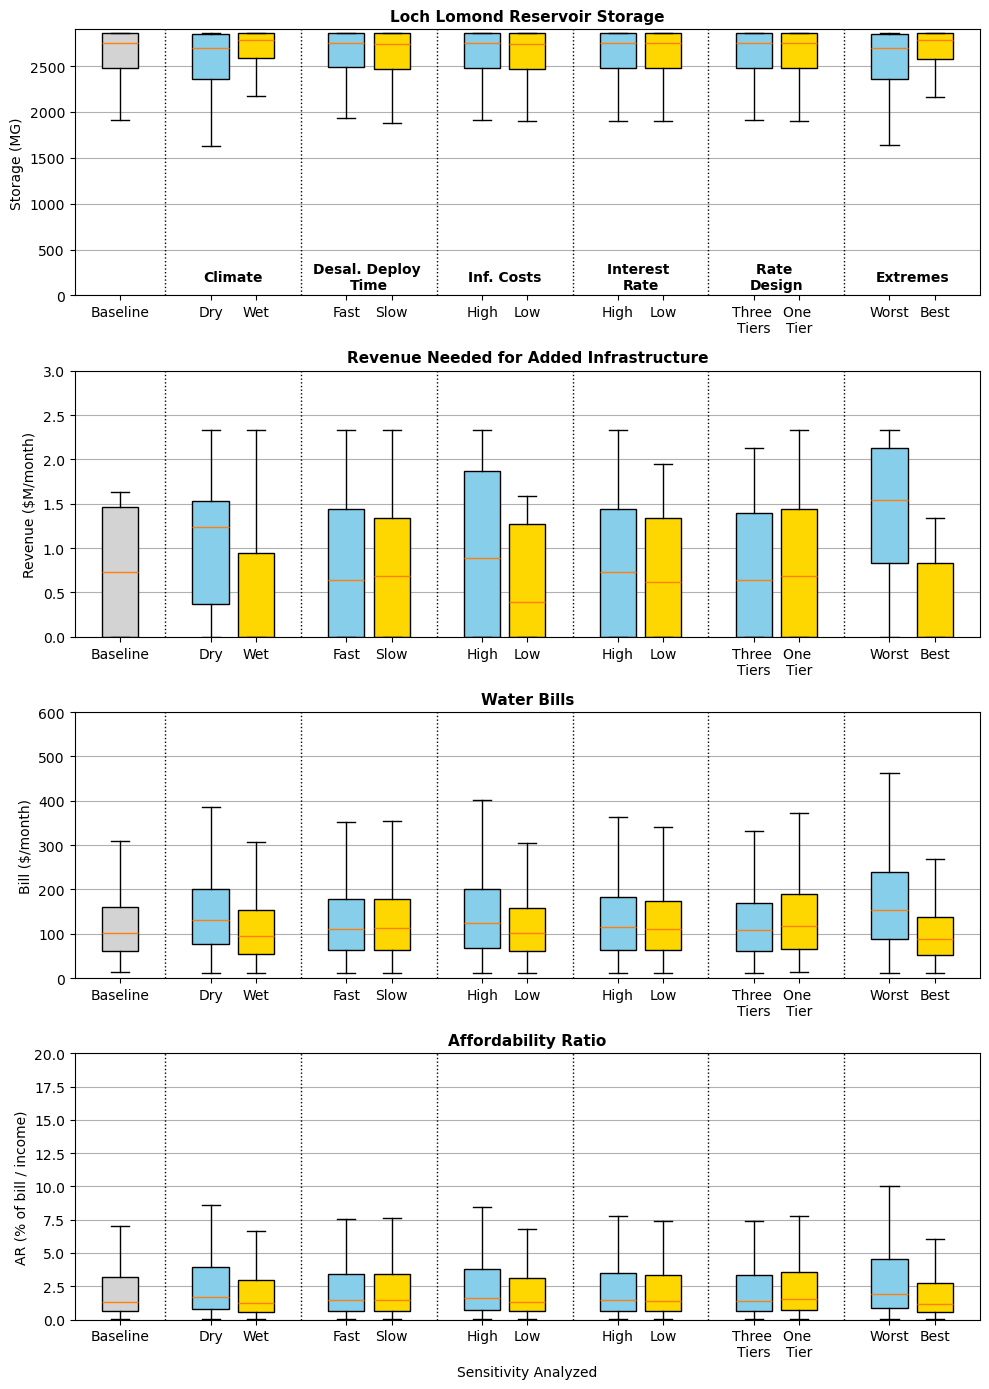

In [5]:
# putting the boxplots all together
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 14))
fig.subplots_adjust(hspace=0.3)
col_names = ['LL_Reservoir_MG', 'rev_mo_M']
ymax = [2900, 3.0]
positions = [0, 2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18]

for i in range(2):
    # compile data
    col_name = col_names[i]
    baseline = df_monthly_baseline[col_name]
    climate_dry = df_all[df_all['dP'] == 80][col_name]
    climate_wet = df_all[df_all['dP'] == 100][col_name]
    desaldeploy_fast = df_all[df_all['DesalDeploy'] == 'Fast'][col_name]
    desaldeploy_slow = df_all[df_all['DesalDeploy'] == 'Slow'][col_name]
    infcosts_high = df_all[df_all['InfCosts'] == 'High'][col_name]
    infcosts_low = df_all[df_all['InfCosts'] == 'Low'][col_name]
    intrate_high = df_all[df_all['InterestRate'] == 'High'][col_name]
    intrate_low = df_all[df_all['InterestRate'] == 'Low'][col_name]
    rate_3tiers = df_all[df_all['RateDesign'] == '3tiers'][col_name]
    rate_1tier = df_all[df_all['RateDesign'] == '1tier'][col_name]
    high = df_all[ #(df_all['DesalDeploy'] == 'Slow') &
    (df_all['InterestRate'] == 'High') &
    (df_all['InfCosts'] == 'High') & (df_all['dP'] == 80)][col_name]
    low = df_all[ #(df_all['DesalDeploy'] == 'Fast') &
    (df_all['InterestRate'] == 'Low') &
    (df_all['InfCosts'] == 'Low') & (df_all['dP'] == 100)][col_name]
    data = [baseline, climate_dry, climate_wet, desaldeploy_fast, desaldeploy_slow, infcosts_high, infcosts_low, intrate_high, intrate_low, rate_3tiers, rate_1tier, high, low]
    
    colors = ['lightgray', 'skyblue', 'gold', 'skyblue', 'gold', 'skyblue', 'gold', 'skyblue', 'gold', 'skyblue', 'gold', 'skyblue', 'gold']

    bp = ax[i].boxplot(data, positions=positions, widths=0.8,
                  labels=["Baseline", "Dry", "Wet", "Fast", "Slow", "High", "Low", "High", "Low", "Three \nTiers", "One \nTier", "Worst", "Best"],
                  showfliers=False, patch_artist=True)
    
    # color the boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    # formatting for both
    ax[i].grid(True, axis='y')
    ax[i].set_ylim((0, ymax[i]))
    ax[i].set_xlim((-1, 19))
    ax[i].plot([1, 1], [0, ymax[i]], linewidth=1, linestyle=':', color='k')
    ax[i].plot([4, 4], [0, ymax[i]], linewidth=1, linestyle=':', color='k')
    ax[i].plot([7, 7], [0, ymax[i]], linewidth=1, linestyle=':', color='k')
    ax[i].plot([10, 10], [0, ymax[i]], linewidth=1, linestyle=':', color='k')
    ax[i].plot([13, 13], [0, ymax[i]], linewidth=1, linestyle=':', color='k')
    ax[i].plot([16, 16], [0, ymax[i]], linewidth=1, linestyle=':', color='k')
    
    # add labels and formatting
    if i == 0:
        
        ax[i].set_ylabel('Storage (MG)')
        ax[i].set_title('Loch Lomond Reservoir Storage', fontsize=11, fontweight='bold')
        x_loc = [2.5, 5.5, 8.5, 11.5, 14.5, 17.5]
        x_labels = ['Climate', 'Desal. Deploy \nTime', 'Inf. Costs', 'Interest \nRate', 'Rate \nDesign', 'Extremes']
        for j in range(len(x_loc)):
            ax[i].text(x_loc[j], 200, x_labels[j], ha='center', va='center', fontweight='bold', fontsize=10)
    
    if i == 1:
        ax[i].set_ylabel('Revenue ($M/month)')
        ax[i].set_title('Revenue Needed for Added Infrastructure', fontsize=11, fontweight='bold')
        #ax[i].set_xlabel('Sensitivity Analyzed')
        
        
#### household-level subplots ####
col_names = ['Bill', 'AR']
ymax = [600, 20]

for i in range(2):
    # compile data
    col_name = col_names[i]
    baseline = df_hh_all_baseline[col_name].astype(np.float64).dropna()
    climate_dry = df_hh_all[df_hh_all['dP'] == 80][col_name]
    climate_wet = df_hh_all[df_hh_all['dP'] == 100][col_name]
    desaldeploy_fast = df_hh_all[df_hh_all['desal_deploy'] == 'Fast'][col_name]
    desaldeploy_slow = df_hh_all[df_hh_all['desal_deploy'] == 'Slow'][col_name]
    infcosts_high = df_hh_all[df_hh_all['inf_costs'] == 'High'][col_name]
    infcosts_low = df_hh_all[df_hh_all['inf_costs'] == 'Low'][col_name]
    intrate_high = df_hh_all[df_hh_all['interest_rate'] == 'High'][col_name]
    intrate_low = df_hh_all[df_hh_all['interest_rate'] == 'Low'][col_name]
    rate_3tiers = df_hh_all[df_hh_all['rate_design'] == '3tiers'][col_name]
    rate_1tier = df_hh_all[df_hh_all['rate_design'] == '1tier'][col_name]
    high = df_hh_all[ #(df_all['DesalDeploy'] == 'Slow') &
    (df_hh_all['interest_rate'] == 'High') &
    (df_hh_all['inf_costs'] == 'High') & (df_hh_all['dP'] == 80)][col_name]
    low = df_hh_all[ #(df_all['DesalDeploy'] == 'Fast') &
    (df_hh_all['interest_rate'] == 'Low') &
    (df_hh_all['inf_costs'] == 'Low') & (df_hh_all['dP'] == 100)][col_name]
    data = [baseline, climate_dry, climate_wet, desaldeploy_fast, desaldeploy_slow, infcosts_high, infcosts_low, intrate_high, intrate_low, rate_3tiers, rate_1tier, high, low]

    bp = ax[i+2].boxplot(data, positions=positions, widths=0.8,
                  labels=["Baseline", "Dry", "Wet", "Fast", "Slow", "High", "Low", "High", "Low", "Three \nTiers", "One \nTier", "Worst", "Best"],
                  showfliers=False, patch_artist=True)
    
    # color the boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    # formatting for both
    ax[i+2].grid(True, axis='y')
    ax[i+2].set_ylim((0, ymax[i]))
    ax[i+2].set_xlim((-1, 19))
    ax[i+2].plot([1, 1], [0, ymax[i]], linewidth=1, linestyle=':', color='k')
    ax[i+2].plot([4, 4], [0, ymax[i]], linewidth=1, linestyle=':', color='k')
    ax[i+2].plot([7, 7], [0, ymax[i]], linewidth=1, linestyle=':', color='k')
    ax[i+2].plot([10, 10], [0, ymax[i]], linewidth=1, linestyle=':', color='k')
    ax[i+2].plot([13, 13], [0, ymax[i]], linewidth=1, linestyle=':', color='k')
    ax[i+2].plot([16, 16], [0, ymax[i]], linewidth=1, linestyle=':', color='k')
    
    # add labels and formatting
    if i == 0:
        
        ax[i+2].set_ylabel('Bill ($/month)')
        ax[i+2].set_title('Water Bills', fontsize=11, fontweight='bold')
        #x_loc = [2.5, 5.5, 8.5, 11.5, 14.5, 17.5]
        x_labels = ['Climate', 'Desal. Deploy \nTime', 'Inf. Costs', 'Interest \nRate', 'Rate \nDesign', 'Extremes']
        #for j in range(len(x_loc)):
            #ax[i].text(x_loc[j], 200, x_labels[j], ha='center', va='center', fontweight='bold', fontsize=9)
    
    if i == 1:
        ax[i+2].set_ylabel('AR (% of bill / income)')
        ax[i+2].set_title('Affordability Ratio', fontsize=11, fontweight='bold')
        ax[i+2].set_xlabel('Sensitivity Analyzed')
       
plt.tight_layout()
plt.savefig('/Users/jenniferskerker/Documents/GradSchool/Research/Equity/Model/Santa_Cruz_WRM_updated/outputs/Figures_SA/Dec2025/Boxplots_SA_InfRates_15Dec.png', dpi=300) 
plt.show()